In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as  plt
get_ipython().run_line_magic('matplotlib', 'inline')
import plotly
import plotly.graph_objects as go
import plotly.express as px


import plotly.offline as pyo
from plotly.offline import init_notebook_mode,plot,iplot

import cufflinks as cf
cf.go_offline()
cf.set_config_file(offline=False, world_readable=True)


import warnings
warnings.filterwarnings("ignore")

In [2]:
sns.set_style('darkgrid')
plt.rcParams['font.size'] = 16
plt.rcParams['figure.figsize'] = (12, 6)

In [3]:
data = pd.read_csv(r"E:\Data Analysis project jupyter lab\EDA Data Analysis Project\World Happiness Data Analysis\world-happiness-report-2021.csv")

In [4]:
data.head()

,Country name,Regional indicator,Happiness score,Standard error of ladder score,upperwhisker,lowerwhisker,Logged GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


In [5]:
happy_df = data.rename(columns = {'Country name': 'country_name', 'Regional indicator': 'regional_indicator',  'Happiness score': 'happiness_score', 'Logged GDP per capita': 'logged_GDP_per_capita','Social support':'social_support', 'Healthy life expectancy':'healthy_life_expectancy','Freedom to make life choices':'freedom_to_make_life_choices', 'Generosity':'generosity', 'Perceptions of corruption':'perceptions_of_corruption'})

In [6]:
happy_df.head()


,country_name,regional_indicator,happiness_score,Standard error of ladder score,upperwhisker,lowerwhisker,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798


Text(0, 0.5, 'GDP per capita')

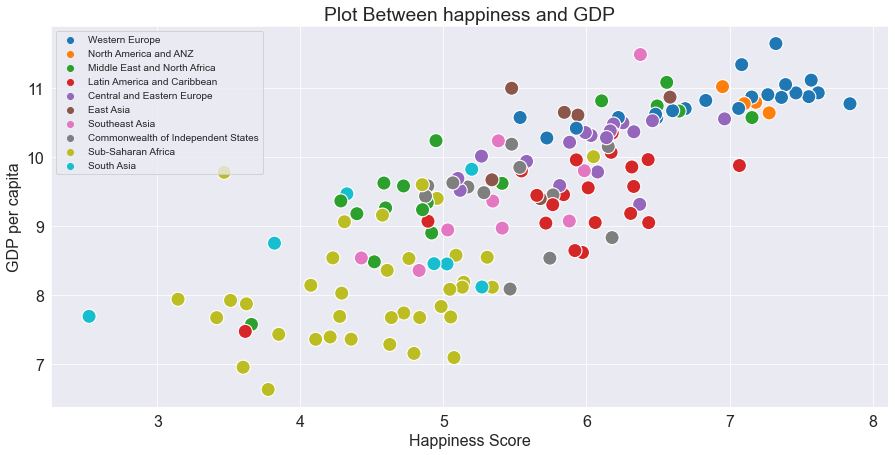

In [7]:
# Plot Between happiness and GDP




plt.rcParams['figure.figsize'] = (15, 7)
plt.title('Plot Between happiness and GDP')
sns.scatterplot(x = happy_df.happiness_score, y=happy_df.logged_GDP_per_capita, hue= happy_df.regional_indicator, s =200 );

plt.legend(loc = 'upper left', fontsize = '10')
plt.xlabel('Happiness Score')
plt.ylabel('GDP per capita')

In [8]:
# GDP in various Reigons


gdp_reigon = happy_df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
gdp_reigon

regional_indicator
Central and Eastern Europe            171.854
Commonwealth of Independent States    112.822
East Asia                              62.206
Latin America and Caribbean           187.400
Middle East and North Africa          164.324
North America and ANZ                  43.238
South Asia                             60.778
Southeast Asia                         84.793
Sub-Saharan Africa                    290.707
Western Europe                        227.277
Name: logged_GDP_per_capita, dtype: float64

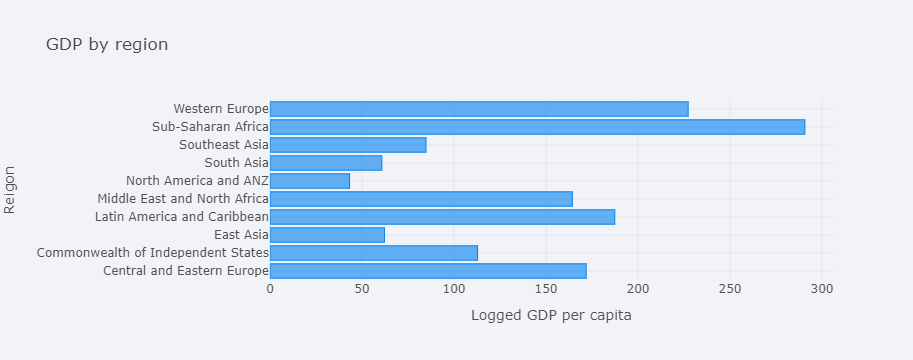

In [9]:
df = happy_df
df = df.groupby('regional_indicator')['logged_GDP_per_capita'].sum()
df = df.reset_index()
ax = df.iplot(x="regional_indicator", y="logged_GDP_per_capita", kind='barh',  title ='GDP by region', theme='polar',
                xTitle = 'Logged GDP per capita', yTitle='Reigon' )
plt.show()


In [10]:
 # Total Countries in different reigons
    
total_countary = happy_df.groupby('regional_indicator')['country_name'].count()
total_countary

regional_indicator
Central and Eastern Europe            17
Commonwealth of Independent States    12
East Asia                              6
Latin America and Caribbean           20
Middle East and North Africa          17
North America and ANZ                  4
South Asia                             7
Southeast Asia                         9
Sub-Saharan Africa                    36
Western Europe                        21
Name: country_name, dtype: int64

<AxesSubplot:>

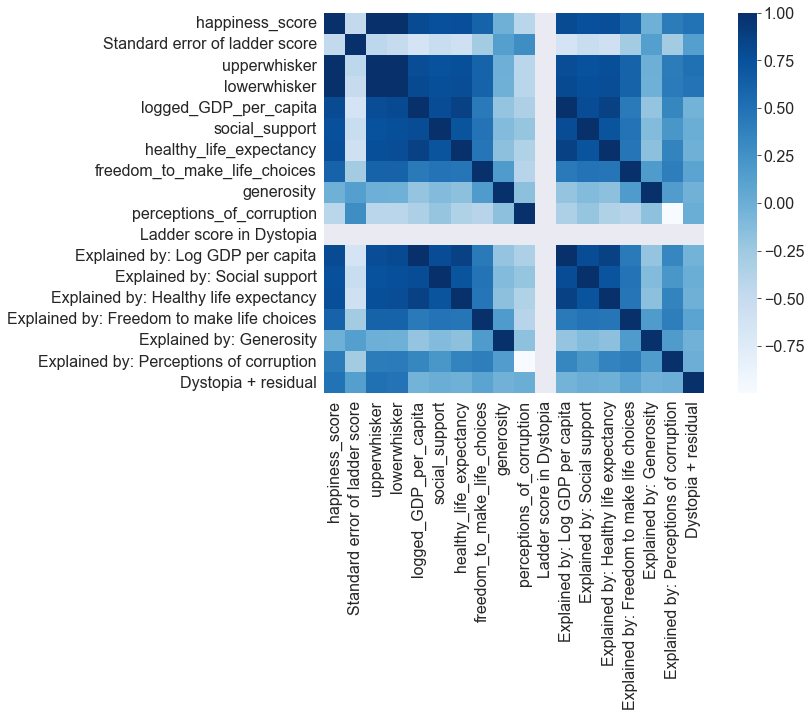

In [11]:
# Correlation of different factors on Happiness score


cor = happy_df.corr(method='pearson')
f,ax = plt.subplots(figsize  = (12, 7))
sns.heatmap(cor, mask= np.zeros_like(cor, dtype = bool),
        cmap="Blues", ax=ax, square=True)

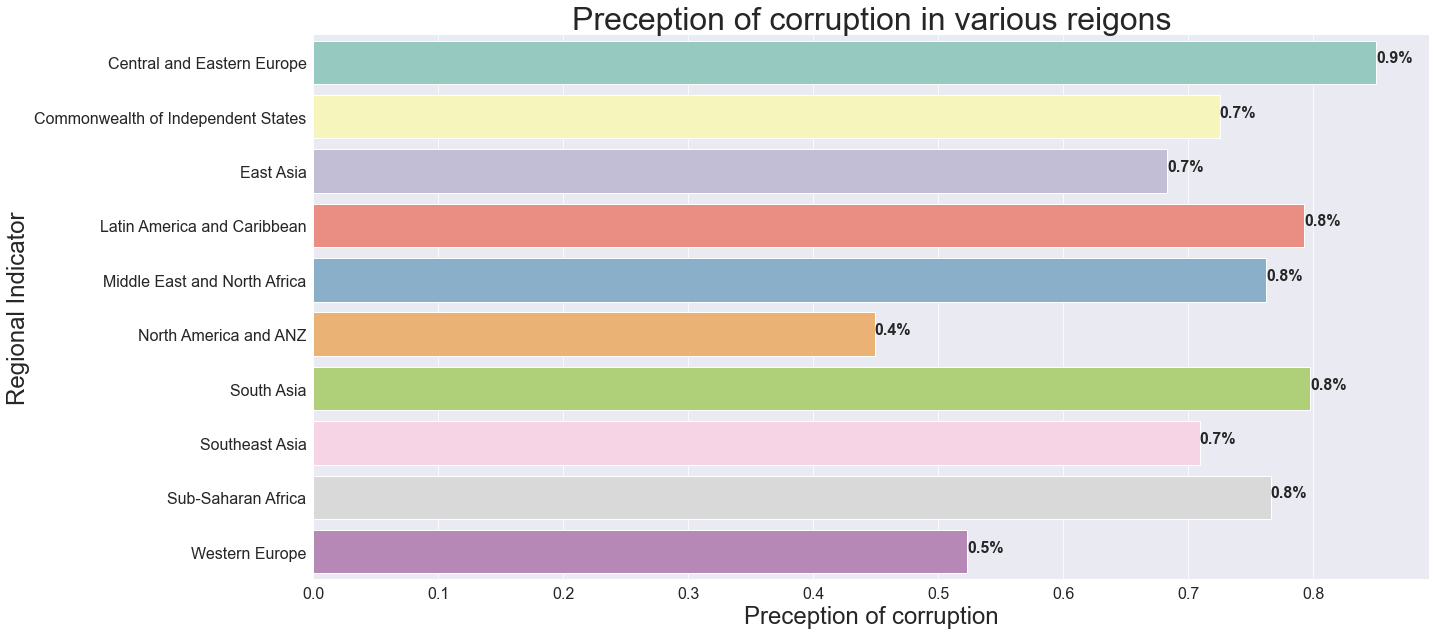

In [12]:
 # Corruption in different regions



f, ax = plt.subplots(figsize=(20, 10))
sns.despine(f)
df = happy_df
df = df.groupby('regional_indicator')['perceptions_of_corruption'].mean()
df = df.reset_index()
sns.barplot(x='perceptions_of_corruption', y='regional_indicator', data=df, ci=None, palette='Set3')
ax.set_title("Preception of corruption in various reigons", fontsize=32)
ax.set_xlabel("Preception of corruption", fontsize = 24)
ax.set_ylabel("Regional Indicator", fontsize = 24)
for rect in ax.patches:
 ax.text (rect.get_width(), rect.get_y() + rect.get_height() / 2,"%.1f%%"% rect.get_width(), weight='bold' )

In [13]:
top10 = happy_df.head(10)
bottom10 = happy_df.tail(10)
top10

,country_name,regional_indicator,happiness_score,Standard error of ladder score,upperwhisker,lowerwhisker,logged_GDP_per_capita,social_support,healthy_life_expectancy,freedom_to_make_life_choices,generosity,perceptions_of_corruption,Ladder score in Dystopia,Explained by: Log GDP per capita,Explained by: Social support,Explained by: Healthy life expectancy,Explained by: Freedom to make life choices,Explained by: Generosity,Explained by: Perceptions of corruption,Dystopia + residual
0,Finland,Western Europe,7.842,0.032,7.904,7.780,10.775,0.954,72.0,0.949,-0.098,0.186,2.43,1.446,1.106,0.741,0.691,0.124,0.481,3.253
1,Denmark,Western Europe,7.620,0.035,7.687,7.552,10.933,0.954,72.7,0.946,0.030,0.179,2.43,1.502,1.108,0.763,0.686,0.208,0.485,2.868
2,Switzerland,Western Europe,7.571,0.036,7.643,7.500,11.117,0.942,74.4,0.919,0.025,0.292,2.43,1.566,1.079,0.816,0.653,0.204,0.413,2.839
3,Iceland,Western Europe,7.554,0.059,7.670,7.438,10.878,0.983,73.0,0.955,0.160,0.673,2.43,1.482,1.172,0.772,0.698,0.293,0.170,2.967
4,Netherlands,Western Europe,7.464,0.027,7.518,7.410,10.932,0.942,72.4,0.913,0.175,0.338,2.43,1.501,1.079,0.753,0.647,0.302,0.384,2.798
5,Norway,Western Europe,7.392,0.035,7.462,7.323,11.053,0.954,73.3,0.960,0.093,0.270,2.43,1.543,1.108,0.782,0.703,0.249,0.427,2.580
6,Sweden,Western Europe,7.363,0.036,7.433,7.293,10.867,0.934,72.7,0.945,0.086,0.237,2.43,1.478,1.062,0.763,0.685,0.244,0.448,2.683
7,Luxembourg,Western Europe,7.324,0.037,7.396,7.252,11.647,0.908,72.6,0.907,-0.034,0.386,2.43,1.751,1.003,0.760,0.639,0.166,0.353,2.653
8,New Zealand,North America and ANZ,7.277,0.040,7.355,7.198,10.643,0.948,73.4,0.929,0.134,0.242,2.43,1.400,1.094,0.785,0.665,0.276,0.445,2.612
9,Austria,Western Europe,7.268,0.036,7.337,7.198,10.906,0.934,73.3,0.908,0.042,0.481,2.43,1.492,1.062,0.782,0.640,0.215,0.292,2.784


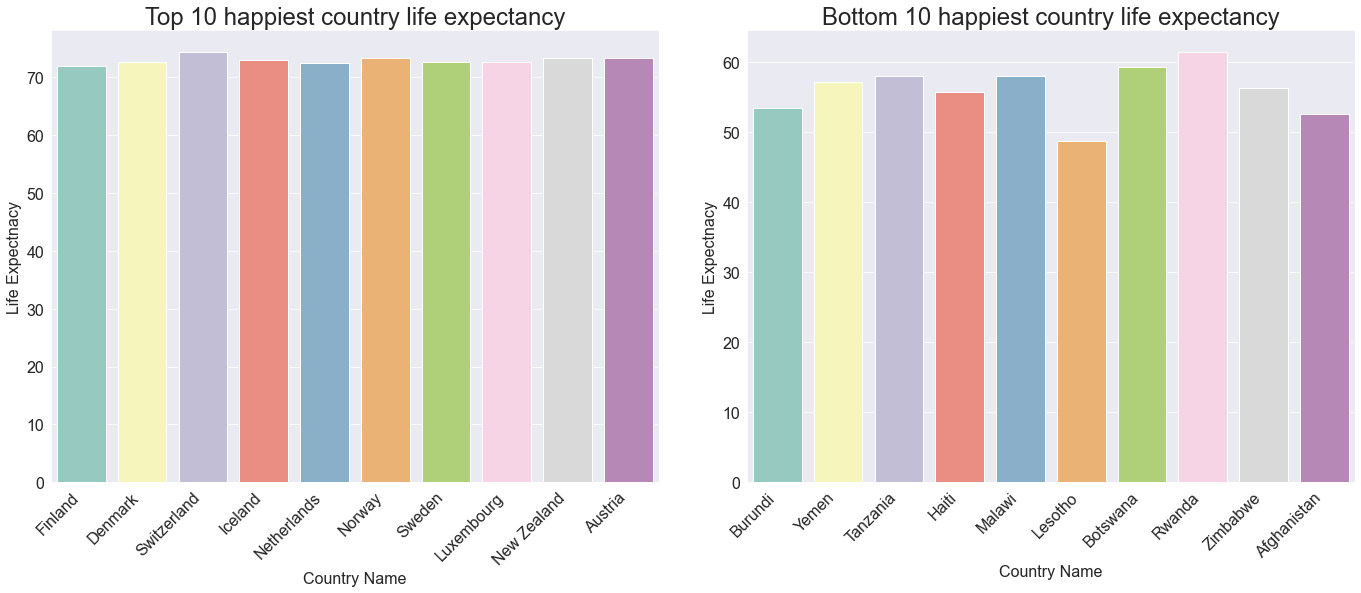

In [14]:
# Life Expectency of TOP and Bottom 10 Happiest Countries



f, ax = plt.subplots(1,2, figsize=(20, 8))
sns.set(font_scale=2)

plt.tight_layout(pad = 2)
xlabels = top10.country_name
ax[0].set_title("Top 10 happiest country life expectancy")
ax[0].set_xticklabels(xlabels, rotation = 45, ha='right' )
sns.barplot(x=top10.country_name, y=top10.healthy_life_expectancy, data=happy_df, ax=ax[0], ci=None, palette='Set3')
ax[0].set_xlabel("Country Name")
ax[0].set_ylabel("Life Expectnacy")


xlabels = bottom10.country_name
ax[1].set_title("Bottom 10 happiest country life expectancy")
ax[1].set_xticklabels(xlabels, rotation = 45, ha='right')
sns.barplot(x=bottom10.country_name, y=bottom10.healthy_life_expectancy, data=happy_df, ax=ax[1], ci=None, palette='Set3')
ax[1].set_xlabel("Country Name")
ax[1].set_ylabel("Life Expectnacy")

plt.show()

Text(0, 0.5, 'Happiness Score')

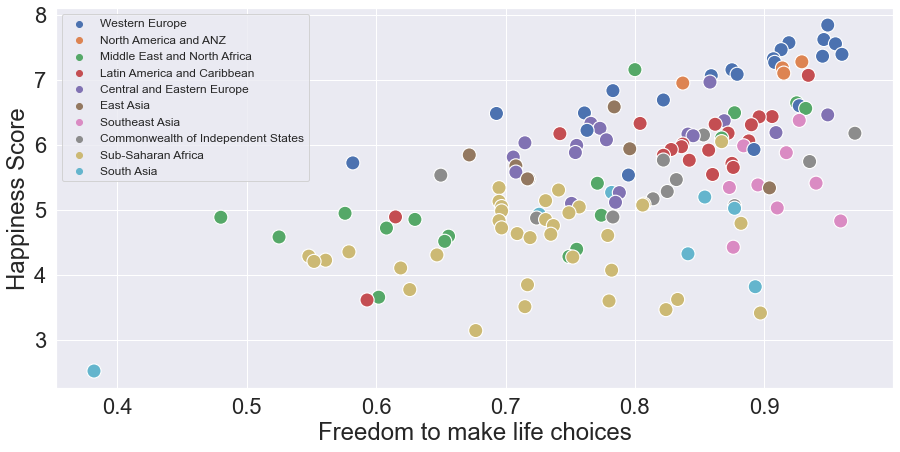

In [15]:
# Freedom to make life choices vs happiness score

plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.freedom_to_make_life_choices, y=happy_df.happiness_score, hue=happy_df.regional_indicator, s= 200)
plt.legend(loc = 'upper left', fontsize ='12' )
plt.xlabel('Freedom to make life choices')
plt.ylabel('Happiness Score')


Text(0, 0.5, 'Corruption')

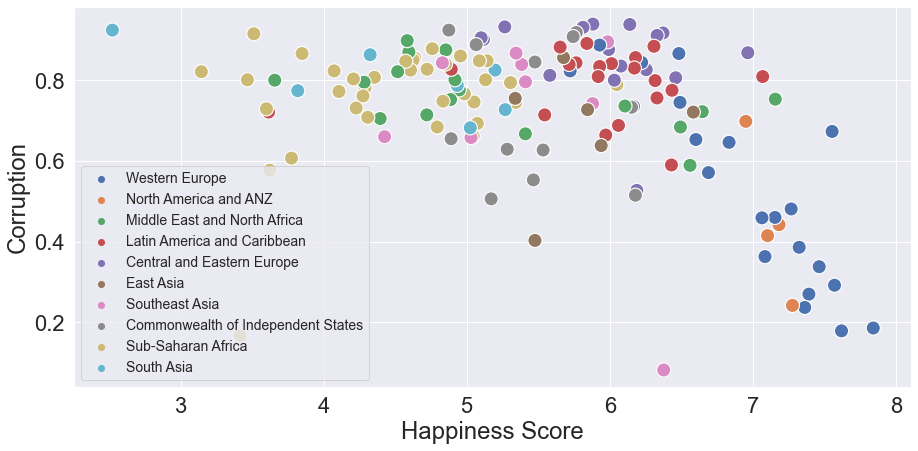

In [16]:
# # Corruption vs Happiness score



plt.rcParams['figure.figsize']=(15,7)
sns.scatterplot(x=happy_df.happiness_score, y=happy_df.perceptions_of_corruption, hue=happy_df.regional_indicator, s= 200)
plt.legend(loc = 'lower left', fontsize ='14' )
plt.xlabel('Happiness Score')
plt.ylabel('Corruption')

In [153]:
# finding happiness score of countries for comparision

Pakistan  = happy_df.set_index('country_name').loc['Pakistan', 'happiness_score']
China = happy_df.set_index('country_name').loc['China', 'happiness_score']
India = happy_df.set_index('country_name').loc['India', 'happiness_score']

In [154]:
data = {'Name':['Pakistan', 'China', 'India'],
        'World_happiness_Index':[Pakistan, China, India] }

df1 = pd.DataFrame(data)
df1

,Name,World_happiness_Index
0,Pakistan,4.934
1,China,5.339
2,India,3.819


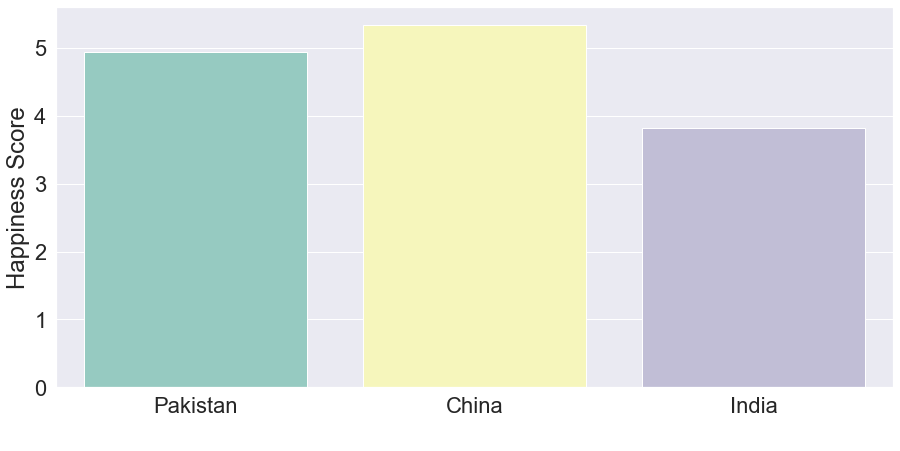

In [155]:
plt.rcParams['figure.figsize']=(15,7)
sns.barplot(x=df1.Name, y=df1.World_happiness_Index, data=df1,  ci=None, palette='Set3')

plt.xlabel(' ')
plt.ylabel('Happiness Score')
plt.show()